# <u>Car price evaluation</u>
**<u>Submitted by:</u>**
Masod Basha 

**Assignment:** Linear Regression <br>
[More information](https://learn.upgrad.com/v/course/235/session/33733/segment/179224)

**Date:** 22-Apr-2019


In [1]:
# Importing Required packages.
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data import ###

In [2]:
# Import data and remove the low memory warning.
DataSet=pd.read_csv('CarPrice_Assignment.csv', low_memory=False)

### 2. Data cleansing ###

In [3]:
# Check for columns with null values
DataSet.columns[DataSet.isna().sum()>0]

Index([], dtype='object')

In [4]:
# Split column CarName into Company and Model.
DataSet['Company']=DataSet['CarName'].str.split(" ", n = 1, expand = True)[0]

In [5]:
# Dropping columns Car_Id and CarName as they don't have any significance. 
# Car id is just a identifies for capturing the details.
# It is common that model name doesn't fetch business in any industry.
DataSet.drop(['car_ID','CarName'],axis=1,inplace=True)

In [6]:
# Checking unique values in each categorical column
ColumnList= list(DataSet.columns[DataSet.dtypes=='object'])
DataSetCat=DataSet.loc[:,ColumnList]

for i in DataSetCat.columns:
    print(i , "->", DataSetCat[i].unique())

fueltype -> ['gas' 'diesel']
aspiration -> ['std' 'turbo']
doornumber -> ['two' 'four']
carbody -> ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel -> ['rwd' 'fwd' '4wd']
enginelocation -> ['front' 'rear']
enginetype -> ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber -> ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem -> ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Company -> ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [7]:
# Looks like there are wrong value provided for drivewheel and company name.
# Change 4wd to fwd as they sound almost the same
DataSet['drivewheel']=DataSet['drivewheel'].str.replace('4wd','fwd')

In [8]:
# company names that have been mis-spelled or written in different cases
#   'maxda' -> 'mazda' 
#   'Nissan' -> 'nissan'
#   'porcshce' -> 'porsche'
#   'toyouta'  -> 'toyota'
#   'vokswagen','vw' -> 'volkswagen'

DataSet['Company']=DataSet['Company'].str.replace('maxda','mazda')
DataSet['Company']=DataSet['Company'].str.replace('Nissan','nissan')
DataSet['Company']=DataSet['Company'].str.replace('porcshce','porsche')
DataSet['Company']=DataSet['Company'].str.replace('toyouta','toyota')
DataSet['Company']=DataSet['Company'].str.replace('vokswagen','volkswagen')
DataSet['Company']=DataSet['Company'].str.replace('vw','volkswagen')

In [9]:
# Checking for duplicate data.
print("Number of duplicates in dataset:",DataSet.duplicated(subset=None, keep='first').sum())

Number of duplicates in dataset: 0


### 3. Data visualization ###

In [10]:
# import required libraries.
import matplotlib.pyplot as plt
import seaborn as sns 

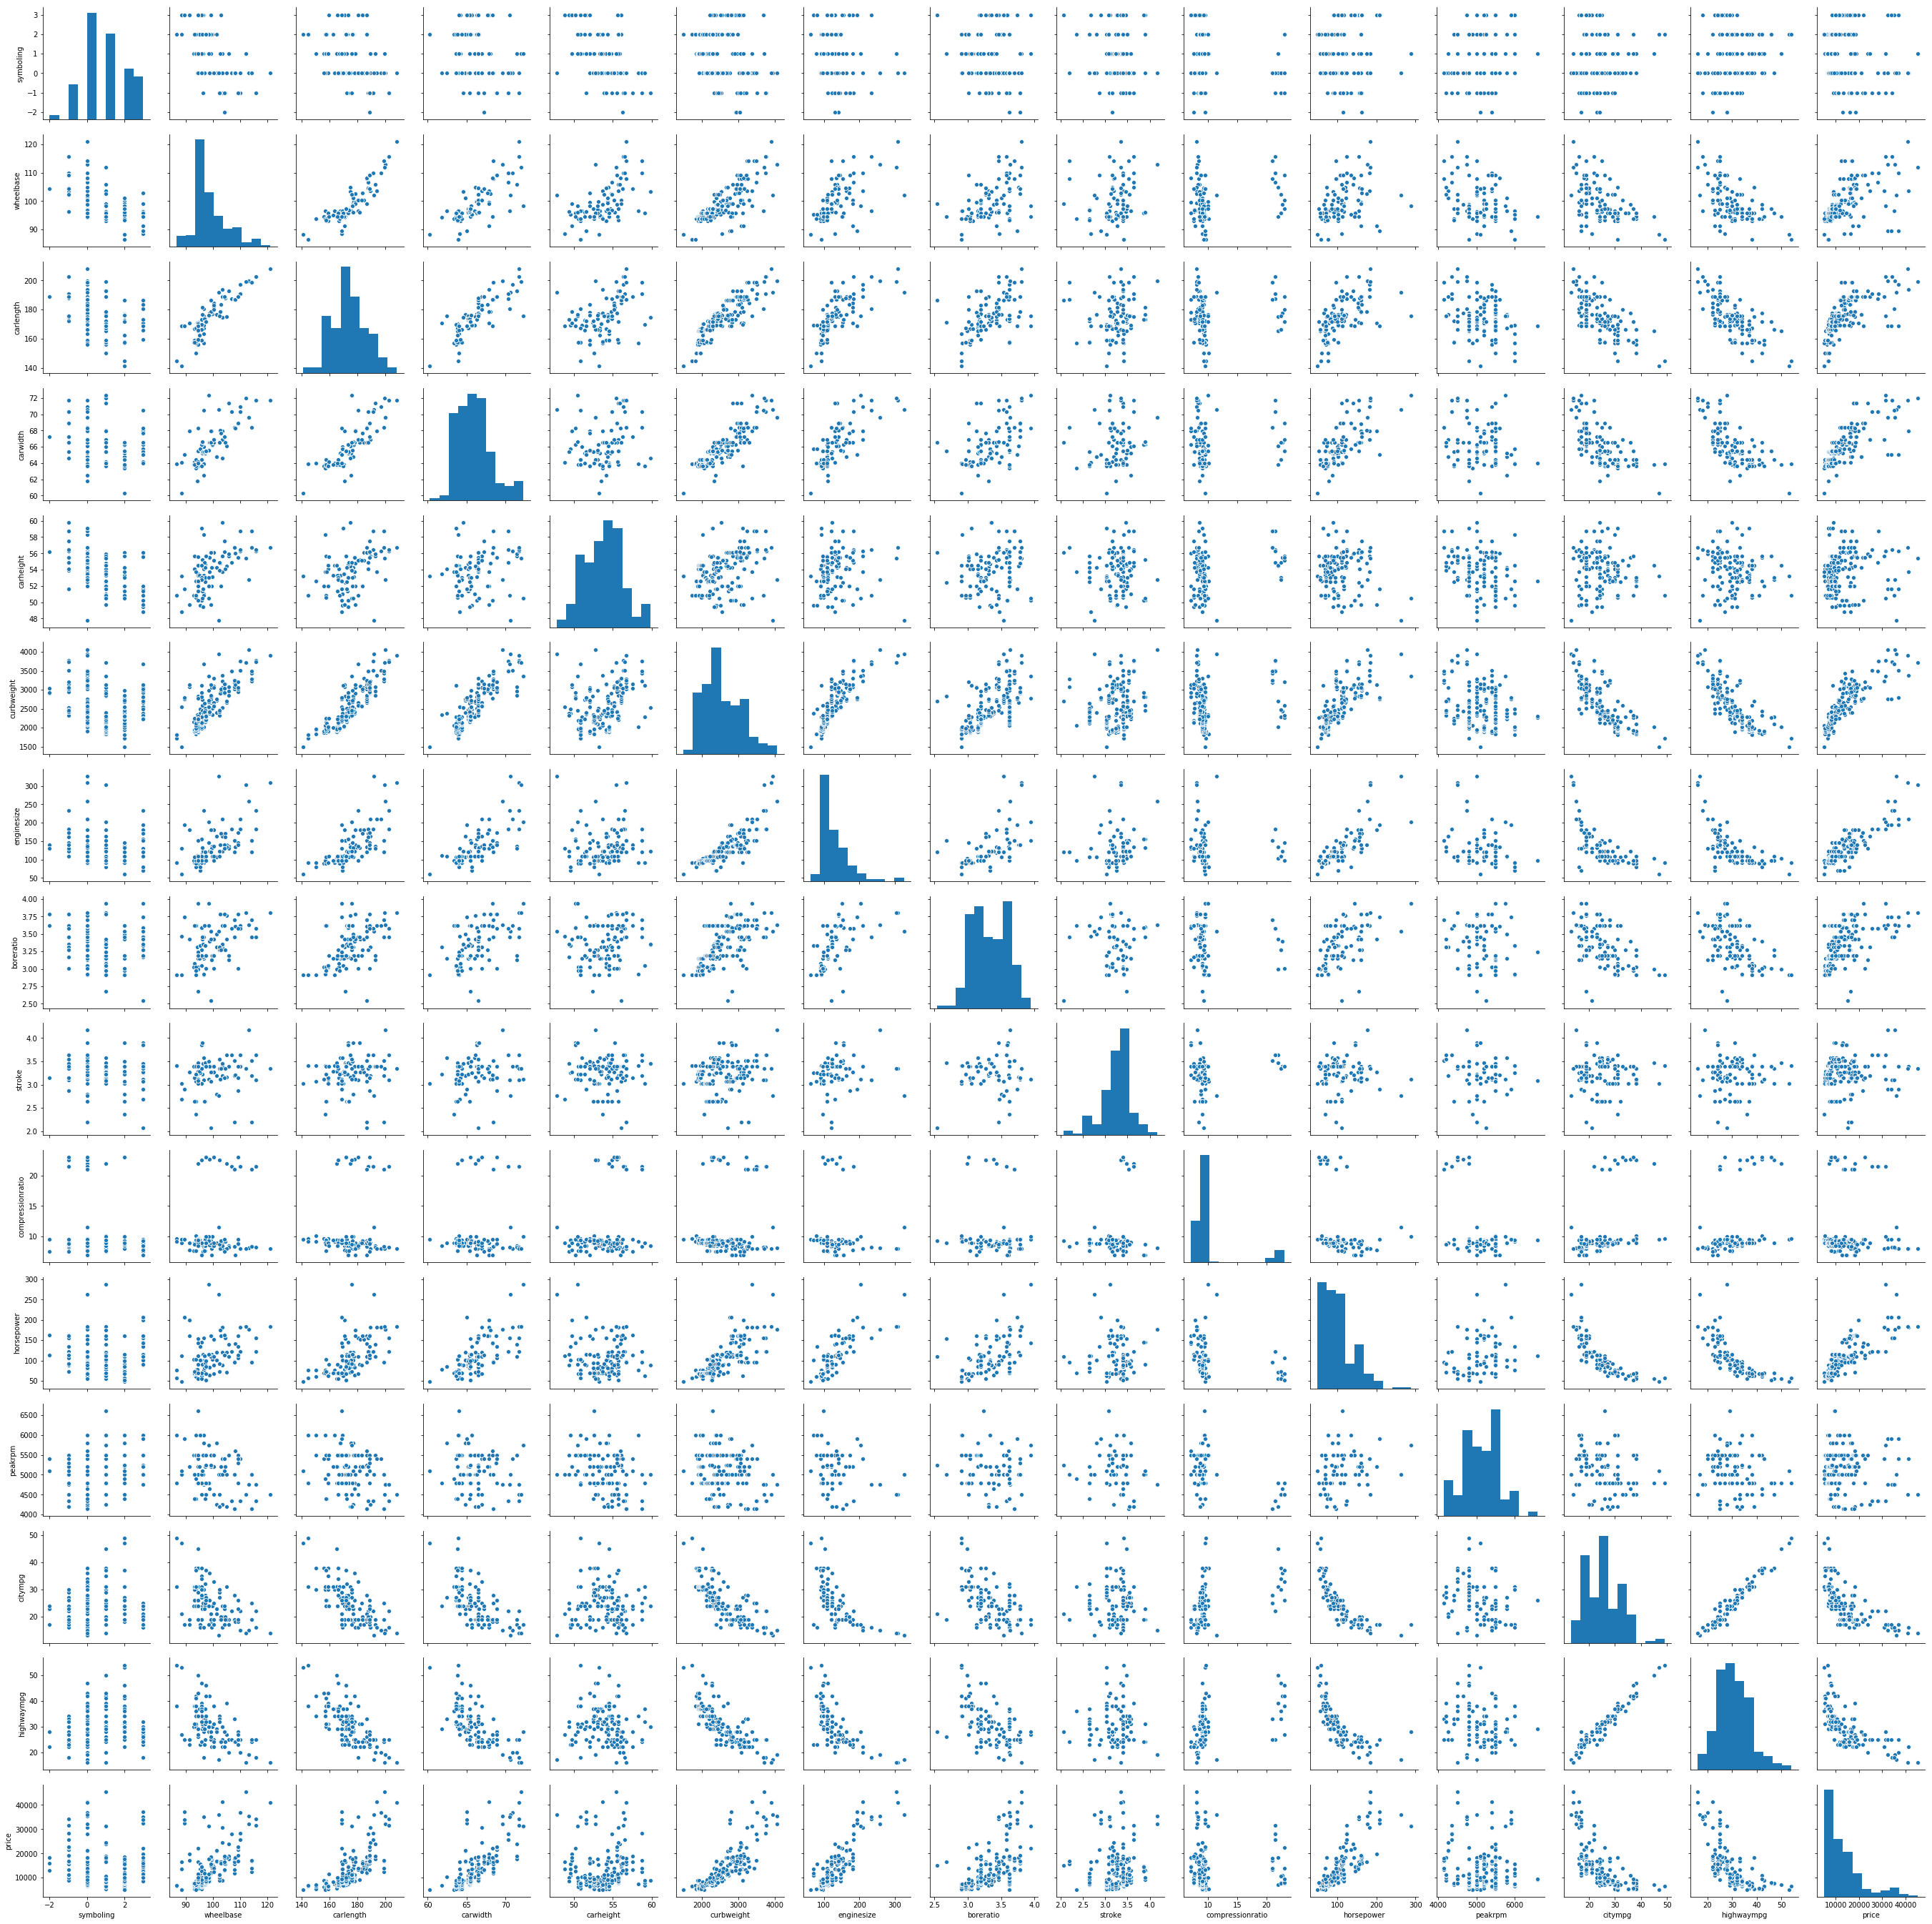

In [11]:
# Visualizing relationship between non object variables and price.
sns.pairplot(DataSet)
plt.show()

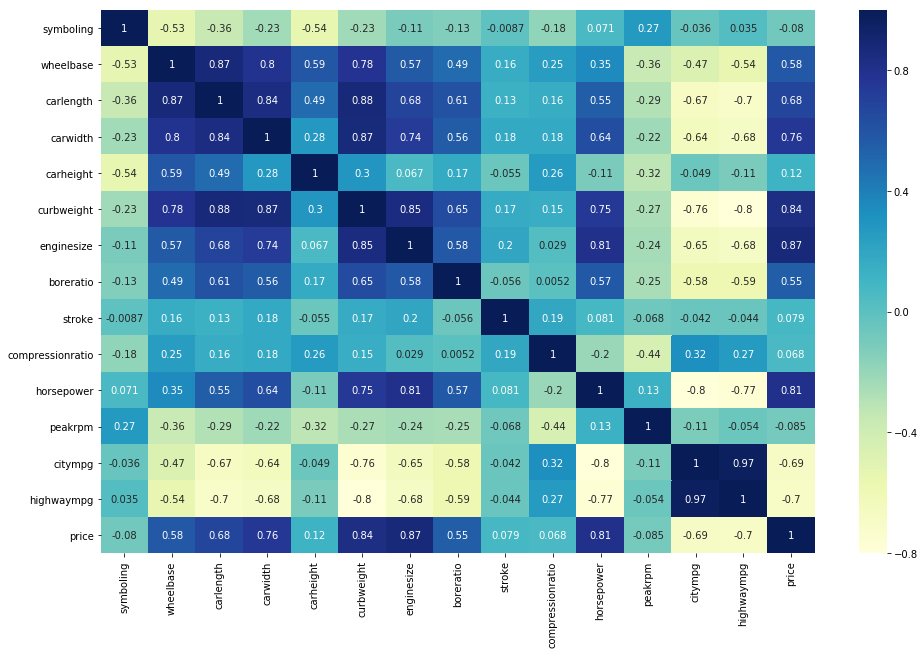

In [12]:
# we will plot a heatmap to look at the corelation in numerical form.
plt.figure(figsize=(16,10))
sns.heatmap(DataSet.corr(),annot=True, cmap='YlGnBu')
plt.show()

**Observations**<br> 
There seems to be some sort of linear relationship between price and almost all the elements other than compression ratio.<br> 

Some of the highly corelated columns with `Price` are `EngineSize, CurbWeight, HorsePower, CarWidth, CarLength, CityMilage and HighwayMilage`

`CurbWeight` seems to have high corelation with `WheelBase, CarLength, CarWidth, EngineSize HorsePower, CityMilage, HighwayMilage`

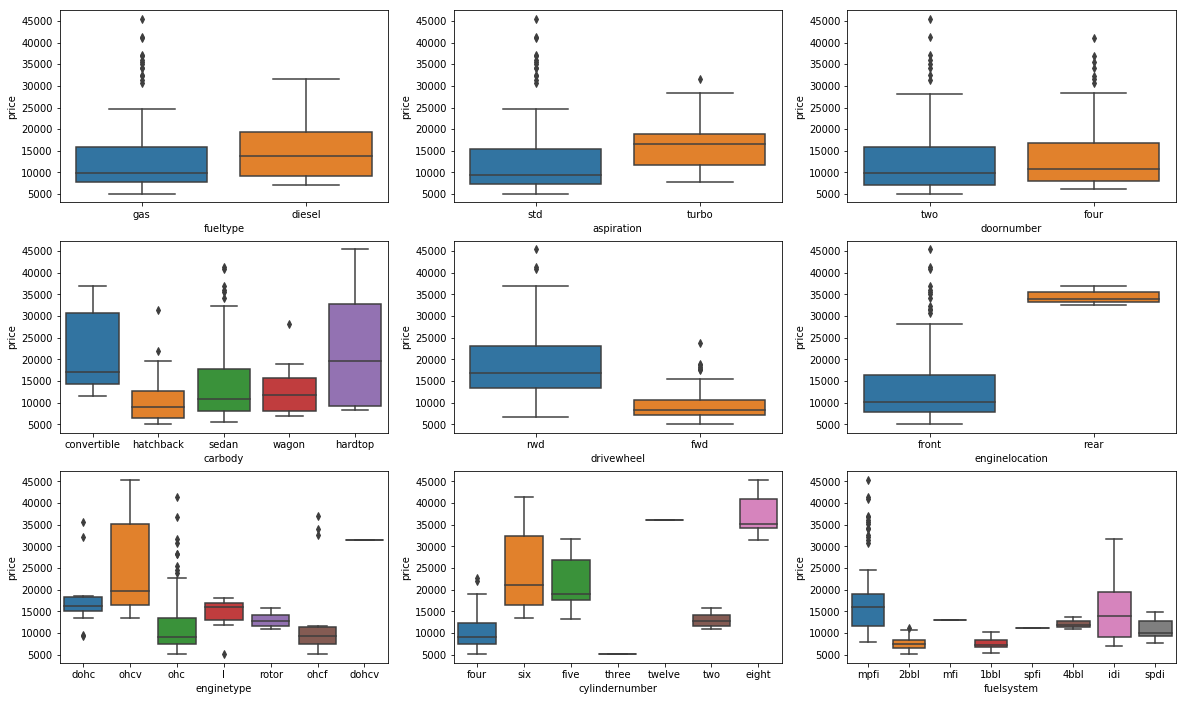

In [13]:
# Visualizing relationship between categorical variable and price using box plots.
plt.figure (figsize=(20,12))
plt.subplot(331)
sns.boxplot (x='fueltype',y='price',data=DataSet)
plt.subplot(332)
sns.boxplot (x='aspiration',y='price',data=DataSet)
plt.subplot(333)
sns.boxplot (x='doornumber',y='price',data=DataSet)
plt.subplot(334)
sns.boxplot (x='carbody',y='price',data=DataSet)
plt.subplot(335)
sns.boxplot (x='drivewheel',y='price',data=DataSet)
plt.subplot(336)
sns.boxplot (x='enginelocation',y='price',data=DataSet)
plt.subplot(337)
sns.boxplot (x='enginetype',y='price',data=DataSet)
plt.subplot(338)
sns.boxplot (x='cylindernumber',y='price',data=DataSet)
plt.subplot(339)
sns.boxplot (x='fuelsystem',y='price',data=DataSet)

**Few observations.**
 1. Diesel fuel type cost more in comparison to gas.
 2. Turbo aspiration seems to cost more.
 3. In few cases we have observed outliers in price incomparion to other categorial variables.
 
 We will not remove any outliers as the dataset is small with only 209 entries.

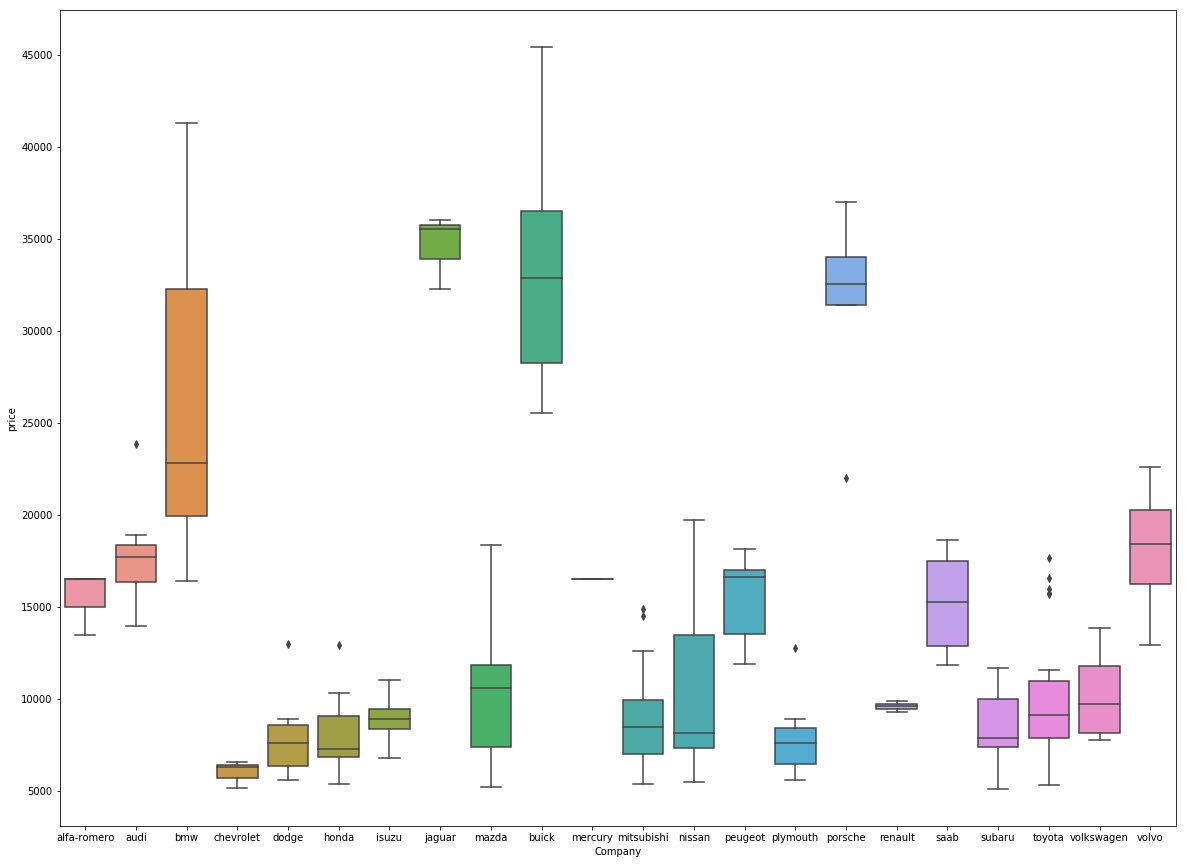

In [14]:
plt.figure (figsize=(20,15))
sns.boxplot (x='Company',y='price',data=DataSet)

**Observations**<br>
From the above plot we can see that `buick` sells the most costliest car.<br>
`Porsche`, `jaguar` and `BMW` also seem to premium brands<br><br>
We will not take company name (brand) into consideration as we want to introduce a new brand to market and decide on the paramters that fix the price of any car.

### 3. Data preparation ###

In [15]:
# Here we will first convert the data from categorical to numerical.
# We are not converting Company names now, as this will lead to more number of columns and logically also it doesn't
# add up to have brand name for price decision.
def ConvertCatInt(df_in, col_name):
    Dummy_Value=pd.get_dummies(df_in[col_name],col_name)
    df_in=pd.concat([df_in,Dummy_Value],axis=1)
    df_in = df_in.iloc[:, :-1]
    df_in.drop(col_name,axis=1,inplace=True)
    return df_in

ColumnList= list(DataSet.columns[(DataSet.dtypes=='object') & (DataSet.columns != 'Company')])
for columns in ColumnList:
    DataSet=ConvertCatInt(DataSet,columns)

In [16]:
print("Number of columns post categorical conversion:",DataSet.shape[1])

Number of columns post categorical conversion: 44


In [17]:
# We will drop company name as we are not considering it as deciding factor when the aim is to introduce a new brand.
DataSet.drop('Company',axis=1, inplace=True)

### 4. Splitting data into train and test ###

In [18]:
# Importing Train_Test_Split to split the data into training and testing set.
from sklearn.model_selection import train_test_split

# We will follow 70%-30% allocation of training to testing data.
np.random.seed(0)
df_train, df_test =train_test_split(DataSet, train_size=0.7, test_size=0.3, random_state=100)

There seem to be a good relationship with price, we can start our model building with this.

**Lets divide the X and Y axis.**

### 4. Rescaling the featuring ###
We will use Min_Max_Scaling instead of standard scaling as mean scaling won't work on categorical values.

In [19]:
# Importing min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler to all the columns otherthan dummy variables.

# Get the list of all columns other than dummy variables.
ColumnList = list(df_train.columns[(df_train.dtypes!='uint8')])

# Converting rest of the columns to float type to avoid DataConversion exception.
df_train[ColumnList] = df_train[ColumnList].astype(float)
df_train[ColumnList]=scaler.fit_transform(df_train[ColumnList])

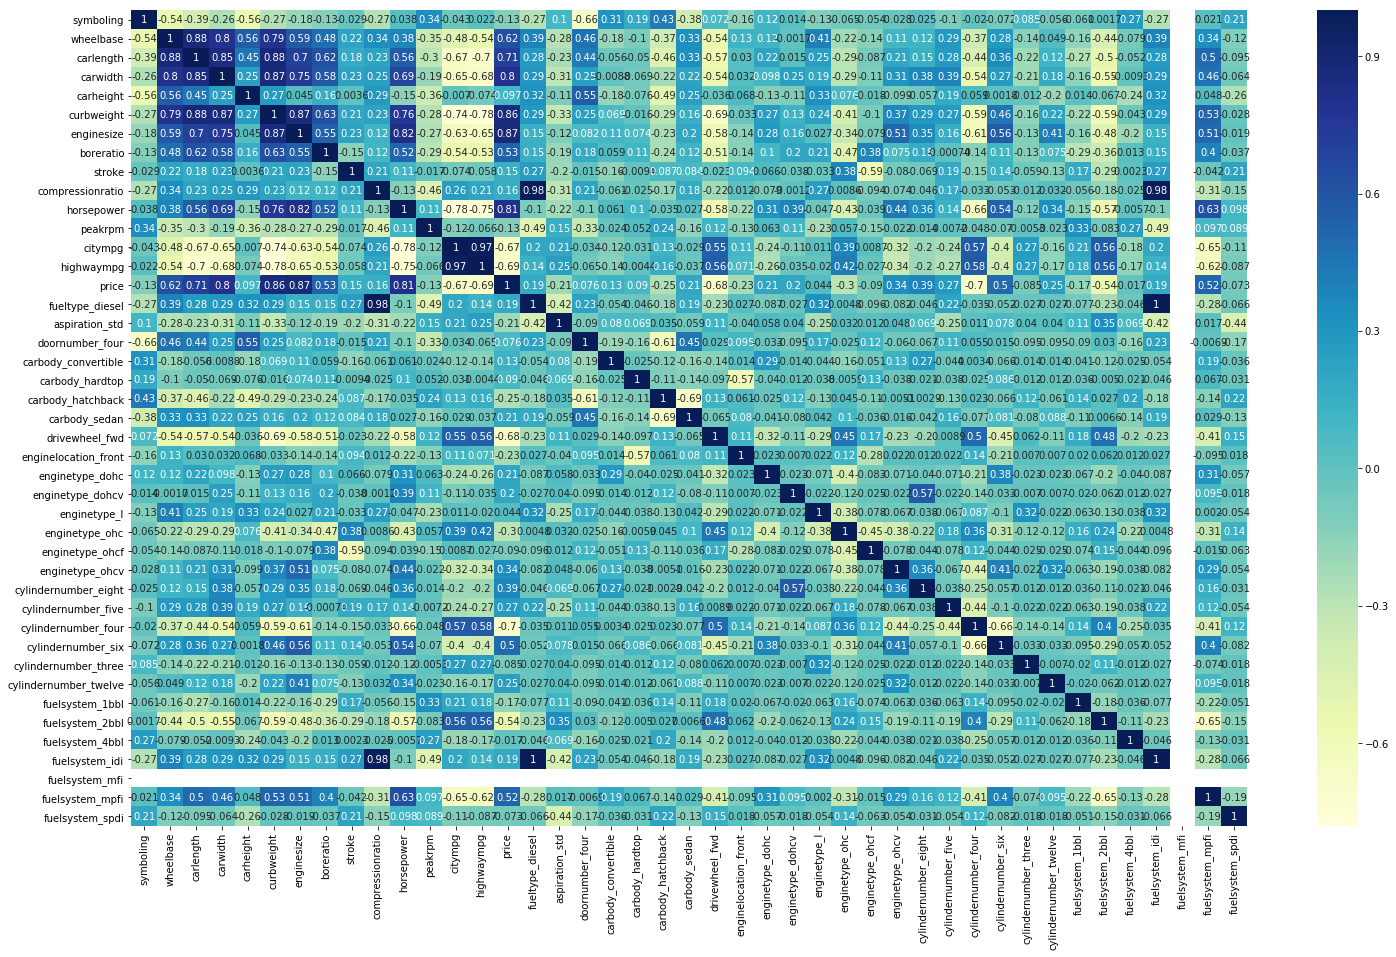

In [20]:
# we will plot a heatmap to look at the corelation in numerical form.
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

**Observations**<br>
Our observations from **Data Visualization** still remains same. <br>

Some of the highly corelated columns with `Price` are `EngineSize, CurbWeight, HorsePower, CarWidth, CarLength, CityMilage and HighwayMilage`

`CurbWeight` seems to have high corelation with `WheelBase, CarLength, CarWidth, EngineSize HorsePower, CityMilage, HighwayMilage`

**Some extra points to note:**
`Drivetype, FuelType and NoOfCylinders` have relationship with price. 

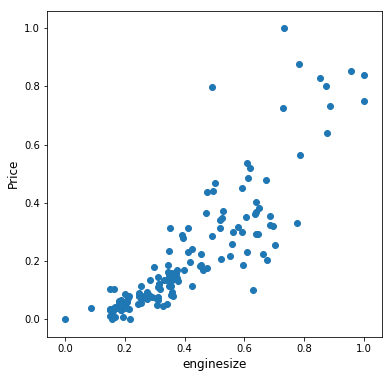

In [21]:
# Lets see how CurbWeight is related to price using a scatterplot.
plt.figure(figsize=(6,6))
plt.scatter(df_train.curbweight,df_train.price)

plt.xlabel('enginesize', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [22]:
# Pop will remove the price column from train set and rest of the columns are considered as decising columns for now.
y_train = df_train.pop('price')
X_train = df_train

### 6. Building the model ###
We will use the linear regression model from statmodels package for getting the information about the statistical results.

In [23]:
import statsmodels.api as sm

# Assign all the feature variables to X
X_train_lm = X_train[['enginesize']]

# Adding a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
LinearRegression = sm.OLS(y_train, X_train_lm).fit()

In [24]:
# Lets check the constant and slope
LinearRegression.params

const        -0.072888
enginesize    1.210676
dtype: float64

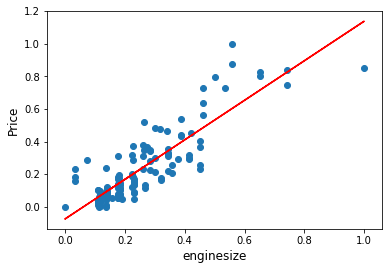

In [25]:
# Lets check the linear relationship between the varibales by plotting graph.
plt.scatter(X_train_lm.loc[:, 'enginesize'],y_train)
plt.plot(X_train_lm.loc[:, 'enginesize'],  LinearRegression.params[0] + LinearRegression.params[1]*X_train_lm.loc[:, 'enginesize'], 'r')
plt.xlabel('enginesize', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

**Observations**<br>
The line seems to be going through most of the data point.<br>
The difference between the predicted value and actual value seems to be little higher when EngineSize is increasing.

In [26]:
#Lets check the parameters of model
print(LinearRegression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.09e-44
Time:                        08:46:47   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

**Observations**<br>
R-squared seems to point at 75% of corelation.<br>
AIC and BIC are lower. <br>
T value specifies that `enginesize` is significant. <br>
P value is almost equal to zero

**Lets try to improve the model by adding another couple columns which have higher relationship with `price but not with enginesize`**

In [27]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize','curbweight', 'horsepower']]

# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
LinearRegression = sm.OLS(y_train, X_train_lm).fit()

LinearRegression.params

const        -0.126942
enginesize    0.474331
curbweight    0.402044
horsepower    0.298222
dtype: float64

In [28]:
#Lets check the parameters of model
print(LinearRegression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.16e-51
Time:                        08:46:47   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

**Observations**<br>
R-squared seems to increase to 81%.<br>
AIC and BIC have reduced by few digits. <br>
T value specifies that `EngineSize, curbweight and Horsepower` are significant. <br>
P value is almost equal to zero. <br>
Adj. R-squared is increased and shows model is holding good. <br><br><br>

**Lets put all the 43 variables and see how the model behaves**

In [29]:
# Build a linear model
X_train_lm = sm.add_constant(X_train)
LinearRegression = sm.OLS(y_train, X_train_lm).fit()

print(LinearRegression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     48.18
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           8.38e-51
Time:                        08:46:47   Log-Likelihood:                 225.97
No. Observations:                 143   AIC:                            -373.9
Df Residuals:                     104   BIC:                            -258.4
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

**Observations**<br>
R-squared seems to increase to 94%.<br>
AIC and BIC have reduced by few more digits. <br>
T value for few have gone into negative which makes them insignificant. <br>
P value has gone for a toss for few variables. <br>
Adj. R-squared is increased and shows model is holding good. <br>
**The best independent variables `EngineSize`,`curbweight` and `horsepower` seem to coming off as insignificant in presence of other variables.**<br><br><br>
**This could be a sign of overfitting. We will use VIF to find corelationship between the columns of train dataset**

In [30]:
# Importing VIP
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create dataframe to hold the VIF entries for all columns
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=True)
vif

,Features,VIF
18,carbody_hardtop,2.180000
22,enginelocation_front,2.980000
17,carbody_convertible,3.310000
16,doornumber_four,3.390000
0,symboling,3.680000
11,peakrpm,3.770000
20,carbody_sedan,3.830000
4,carheight,4.530000
15,aspiration_std,5.400000
21,drivewheel_fwd,5.550000


**Observations**<br>
The variables such as `EngineSize` `curbweight` and `horsepower` which came out as highly significant show that they are highly corelated to other vairiable.<br>
In this case, we can either remove all the variables with high VIF or we can remove the variables which are highly corelated to them.<br><br><br>

**Lets use the method RFE to findout top 10 variables influencing price.**

In [31]:
# Importing RFE and LinearRegression from sklearn. We cann't achieve RFE using statsmodel package.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)
ColumnListModel=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_))).sort_values(by=2, ascending=True).iloc[0:10,0]

# Remove carweight as it has high corelation with curbweight and engine size.
ColumnListModel=ColumnListModel[(ColumnListModel != 'carwidth')]
#                                 & (ColumnListModel != 'stroke')]

# Adding curbweight and horsepower as they are significant.
ColumnListModel=ColumnListModel.append(pd.Series(['curbweight','horsepower','symboling','carbody_hardtop'
                                                  ,'carbody_convertible','carbody_hatchback',
                                                 'carbody_sedan','citympg']), ignore_index=True)

print(ColumnListModel)

0       cylindernumber_five
1      enginelocation_front
2       cylindernumber_four
3        cylindernumber_six
4                enginesize
5                 boreratio
6                    stroke
7     cylindernumber_twelve
8      cylindernumber_eight
9                curbweight
10               horsepower
11                symboling
12          carbody_hardtop
13      carbody_convertible
14        carbody_hatchback
15            carbody_sedan
16                  citympg
dtype: object


**Observations**<br>
The variable `EngineSize` has made it to the top 10 list. <br>
The highly corelated variables `curbweight` and `horsepower` are at rank 2 and 5 respectively.<br>
We will remove `carweight` as it is highly co related with `curbweight`


**Lets build a model with top 10 variables and `curbweight` and `horsepower`.**

In [32]:
# Build a linear model
X_train_lm = X_train[ColumnListModel]
X_train_lm = sm.add_constant(X_train_lm)
LinearRegression = sm.OLS(y_train, X_train_lm).fit()

print(LinearRegression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     54.22
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.78e-49
Time:                        08:46:48   Log-Likelihood:                 168.90
No. Observations:                 143   AIC:                            -301.8
Df Residuals:                     125   BIC:                            -248.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.42

**Observations**<br>
All the variables provided other than `CarWeight`,`EngineSize`,`CurbWeight` and `HorsePower` have negative co-efficient and negative t-value<br>
Now we have a R-square of 86.9% while adj is 85.8%.

In [33]:
# Importing VIP
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create dataframe to hold the VIF entries for all columns
vif=pd.DataFrame()
vif['Features']=X_train[ColumnListModel].columns
vif['VIF']=[variance_inflation_factor(X_train[ColumnListModel].values,i) for i in range(X_train[ColumnListModel].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=True)
vif

,Features,VIF
12,carbody_hardtop,1.65
13,carbody_convertible,1.96
15,carbody_sedan,5.59
14,carbody_hatchback,5.68
0,cylindernumber_five,6.64
8,cylindernumber_eight,7.81
7,cylindernumber_twelve,9.62
11,symboling,12.37
16,citympg,14.91
10,horsepower,20.98


**Observations**<br>
Variance seems to be high for all the considered variables but our model is performing good.<br>

### 6. Residual Analysis of the train data  ###
 We will check if the error terms are also normally distributed.

In [34]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

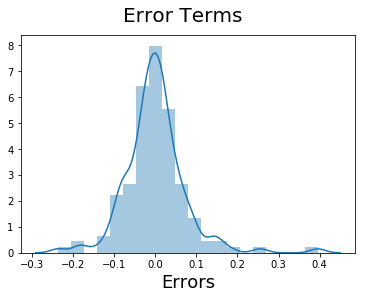

In [35]:
# Get the training prediction price.
y_train_price = LinearRegression.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Observations**<br>
Error term seems follow normal distribution.

### 7. Model prediction  ###
 We will check if the error terms are also normally distributed.

In [36]:
####### Perform scaling of test data wrt training data ##########
# Get the list of all columns other than dummy variables.
ColumnList = list(df_test.columns[(df_test.dtypes!='uint8')])
df_test[ColumnList] = df_test[ColumnList].astype(float)

# Perform standard scaling
df_test[ColumnList] = scaler.transform(df_test[ColumnList])

In [37]:
# df_test_bkp = df_test
y_test = df_test['price']
X_test = df_test[ColumnListModel]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

# Making predictions using the fourth model
y_pred = LinearRegression.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

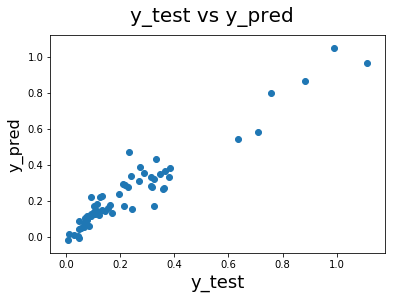

In [38]:
# Plotting y_test and y_pred to data.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Conclusion ##

Looks like the deciding factors are.
1. Engine size.
2. CurbWeight
3. HorsePower.
4. Number of cylinders.
5. Stroke or engine cc.
6. BoreRatio.
7. Location of engine.
8. symboling
9. City Milage

In [39]:
from sklearn.metrics import r2_score
print('The R-squared score for test data has come to:', round(r2_score(y_test, y_pred),2))

The R-squared score for test data has come to: 0.92
